In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import statistics

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
#counting the number of people who were prescribed medicine for diabetes

df.groupby(['diabetesMed'])['encounter_id'].count()

,encounter_id
diabetesMed,
No,23403
Yes,78363


In [ ]:
#dropping all null values from diabetesMed column
df['diabetesMed'].dropna()

#one dataframe with only those who have been prescribed diabetes medication, and one daataframe for those who have not been prescribed diabetes medication
prescribedMed = df.loc[(df['diabetesMed'] == 'Yes')]
notPrescribed = df.loc[(df['diabetesMed'] == 'No')]

In [ ]:
#checking both dataframes

#prescribedMed.head()
notPrescribed.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
22,182796,63000108,AfricanAmerican,Female,[70-80),?,2,1,4,2,...,No,No,No,No,No,No,No,No,No,NO
23,183930,107400762,Caucasian,Female,[80-90),?,2,6,1,11,...,No,No,No,No,No,No,No,No,No,>30
50,550098,21820806,AfricanAmerican,Male,[50-60),?,2,1,2,4,...,No,No,No,No,No,No,No,No,No,<30
70,870294,95075649,Caucasian,Female,[70-80),?,1,6,7,7,...,No,No,No,No,No,No,No,No,No,<30


In [ ]:
#checking average number of diagnoses for those in the group that were prescribed diabetes medication
medsmeandiag = statistics.fmean(prescribedMed['number_diagnoses'])
print(medsmeandiag)

7.444993172798387


In [ ]:
#checking average number of diagnoses for those who were not prescribed diabetes medication
nomedsmeandiag = statistics.fmean(notPrescribed['number_diagnoses'])
print(nomedsmeandiag)

7.347647737469555


In [ ]:
#checking average number of lab procedures for prescribed diabetes meds
statistics.fmean(prescribedMed['num_lab_procedures'])

43.45160343529472

In [ ]:
#checking average number of lab procedures for non prescribed
statistics.fmean(notPrescribed['num_lab_procedures'])

41.903730290988335

<Axes: xlabel='Prescribed Meds', ylabel='Average Number of Diagnoses'>

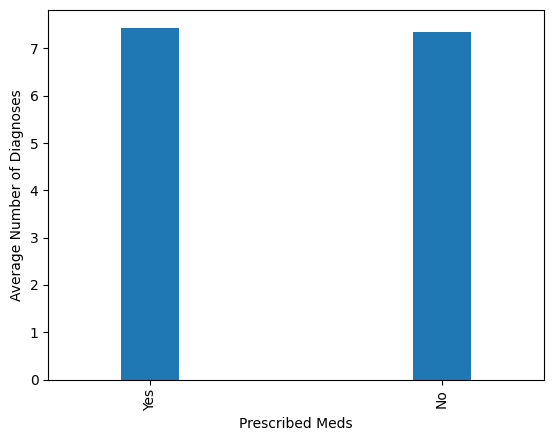

In [ ]:
#creating dataframe for data (avg # of diagnoses)

data = [["Yes", 7.44],
        ["No", 7.35]]

#plotting data

comparison = pd.DataFrame(data, columns=["Prescribed Meds", "Average Number of Diagnoses"])

comparison.plot(x="Prescribed Meds", y = "Average Number of Diagnoses",
                kind='bar', width = 0.2, ylabel = "Average Number of Diagnoses", legend=False)

<Axes: xlabel='Prescribed Meds', ylabel='Average Number of Diagnoses'>

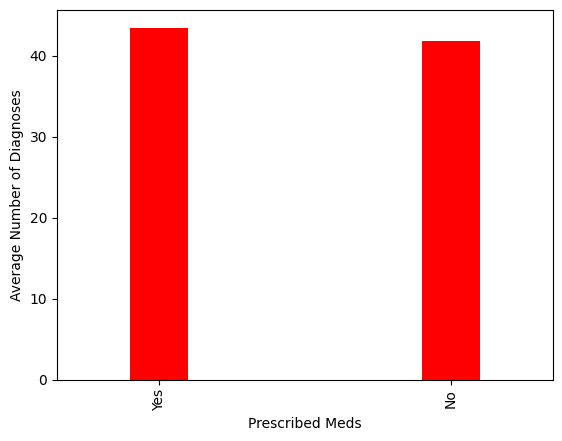

In [ ]:
#creating dataframe for data (avg # of lab procedures)

data = [["Yes", 43.51],
        ["No", 41.90]]

#plotting data

comparison = pd.DataFrame(data, columns=["Prescribed Meds", "Average Number of Diagnoses"])

comparison.plot(x="Prescribed Meds", y = "Average Number of Diagnoses",
                kind='bar', width = 0.2, color='red',
                ylabel = "Average Number of Diagnoses", legend=False)

Using this dataset, I looked at a few variables comparing those who had been prescribed diabetes medication with those who had not been, a potentially good indicator for if the patient has diabetes. With these and future analyses, the hospital can determine how much additional spending goes towards patients with diabetes, and can pursue alternative funding ventures this way.